In [3]:
import os
import numpy as np
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

In [4]:
class ClassicalClustering:
    def __init__(self, n_clusters=5, metric='euclidean', random_state=42):
        self.n_clusters = n_clusters
        self.metric = metric
        self.random_state = random_state
        self.model = KMedoids(n_clusters=self.n_clusters, metric=self.metric, random_state=self.random_state)
    
    def fit_predict(self, embeddings):
        """Fits k-medoids clustering and returns cluster labels."""
        return self.model.fit_predict(embeddings)
    
    def plot_clusters(self, embeddings, labels, save_path=None):
        """Visualizes clustered embeddings in a scatter plot and saves the figure if save_path is provided."""
        plt.figure(figsize=(8, 6))
        plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='Spectral', s=10)
        plt.colorbar()
        plt.title('K-Medoids Clustering')
        
        # if save_path:
        #     plt.savefig(save_path, dpi=300)
        
        plt.show()

In [8]:
np.random.seed(42)
script_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(script_dir, "..", "..", "data"))
reduced_embeddings_path = os.path.join(data_dir, "doc_embeddings_reduced.npy")

In [9]:
if not os.path.exists(reduced_embeddings_path):
    raise FileNotFoundError(f"Reduced embeddings file not found at: {reduced_embeddings_path}")

In [10]:
doc_embeddings_reduced = np.load(reduced_embeddings_path)

In [12]:
clustering = ClassicalClustering(n_clusters=5)
labels = clustering.fit_predict(doc_embeddings_reduced)

In [13]:
clustered_output_path = os.path.join(data_dir, "cluster_labels.npy")
# np.save(clustered_output_path, labels)

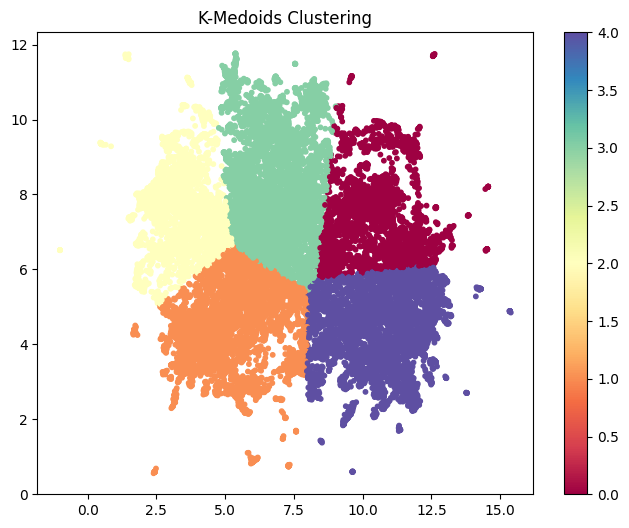

In [14]:
plot_path = os.path.join(data_dir, "kmedoids_clusters.png")
clustering.plot_clusters(doc_embeddings_reduced, labels, save_path=None)

In [15]:
print(f"Cluster labels saved at: {clustered_output_path}")
print(f"Cluster plot saved at: {plot_path}")

Cluster labels saved at: c:\Users\karishma\OneDrive\Projects\qCLEF\data\cluster_labels.npy
Cluster plot saved at: c:\Users\karishma\OneDrive\Projects\qCLEF\data\kmedoids_clusters.png
